In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import demoji
from sklearn.model_selection import train_test_split, GridSearchCV
pd.set_option('display.max_colwidth', 50)

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\chuaz\OneDrive\MSBA\Sem 4\BT5153\Project/comments_and_tags.csv', sep = ',', index_col = 'Unnamed: 0')
# make the 3 class problem into a binary problem
df['sentiment_binary'] = df['sentiment'].apply(lambda x: 1 if x == 1 else 0 )
df=df.reset_index()
df.head()

,index,id,sentiment,search_term,tagger,author,body,created_utc,link_id,permalink,score,subreddit,post_name,filename,sentiment_binary
0,0,glngetr,0,ladvc3,SUPRATIK,nevabraun,Thanks but you’ve lost me at \n\n„If look at A...,1612214426,t3_ladvc3,/r/wallstreetbets/comments/ladvc3/just_bought_...,21,wallstreetbets,"Just bought 860 of AMC, greetings from Germany...",comments_batch_6.csv,0
1,1,glndurd,1,ladvc3,SUPRATIK,Awake_4E,Awesome 😎! Why the moon 🤔 Let’s shoot AMC out ...,1612213448,t3_ladvc3,/r/wallstreetbets/comments/ladvc3/just_bought_...,25,wallstreetbets,"Just bought 860 of AMC, greetings from Germany...",comments_batch_6.csv,1
2,2,glndfos,1,ladvc3,SUPRATIK,Cloud9forreal,If you look at AMCs business page you’ll find ...,1612213289,t3_ladvc3,/r/wallstreetbets/comments/ladvc3/just_bought_...,58,wallstreetbets,"Just bought 860 of AMC, greetings from Germany...",comments_batch_6.csv,1
3,3,glnd58d,1,ladvc3,SUPRATIK,MacCoy69,"I bought 20 today, i am also a retarded dumb m...",1612213186,t3_ladvc3,/r/wallstreetbets/comments/ladvc3/just_bought_...,13,wallstreetbets,"Just bought 860 of AMC, greetings from Germany...",comments_batch_6.csv,1
4,4,glnd2xt,1,ladvc3,SUPRATIK,Menuler,"Ahh, my fellow Retard. I see the more and more...",1612213163,t3_ladvc3,/r/wallstreetbets/comments/ladvc3/just_bought_...,11,wallstreetbets,"Just bought 860 of AMC, greetings from Germany...",comments_batch_6.csv,1


In [3]:
def find_pos(word):
    # Part of Speech constants
    # ADJ, ADJ_SAT, ADV, NOUN, VERB = 'a', 's', 'r', 'n', 'v'
    pos= nltk.pos_tag(nltk.word_tokenize(word))[0][1]
    # Adjective tags -'JJ', 'JJR', 'JJS'
    if pos.lower()[0] == 'j':
        return 'a'
    # Adverb tags -'RB', 'RBR', 'RBS'
    elif pos.lower()[0] == 'r':
        return 'r'
    # Verb tags -'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'
    elif pos.lower()[0] == 'v':
        return 'v'
    # Noun tags -'NN', 'NNS', 'NNP', 'NNPS'
    else:
        return 'n'

demoji.download_codes()

def remove_emoji(text):
    dem = demoji.findall(text)
    for item in dem.keys():
        text = text.replace(item, ':'+ dem[item].replace(" ", "")+':'+' ') # replace with emoji mapping and additional space
        
    return text

# Function to apply lemmatization to a list of words
def words_lemmatizer(text, encoding="utf8"):
    words = nltk.word_tokenize(text)
    lemma_words = []
    wl= WordNetLemmatizer()
    for word in words:
        pos= find_pos(word)
        lemma_words.append(wl.lemmatize(word, pos))
    return " ".join(lemma_words)

def do_preprocessing(df_series):
    custom_pipeline = [hero.preprocessing.fillna, #remove NA
                          hero.preprocessing.lowercase, # lowercase
                          hero.preprocessing.remove_urls,
                          hero.preprocessing.remove_digits, # remove numbers
                          hero.preprocessing.remove_punctuation # remove punctuation
                          ] 
    df_series = df_series.pipe(hero.clean, custom_pipeline)

    df_series = df_series.apply(remove_emoji) # Remove emojis

     # add custom stopwords
    default_stopwords = stopwords.DEFAULT
    new_words = ['already','also','comment','delete','even','literally','lolol','lololol','lolz','lols','lot','loll','lolololol','lolll','mean','na',
                'point','post','probably','put','reddit','remove','see','something','want','well']
    custom_stopwords = default_stopwords.union(set(new_words))
    df_series = hero.preprocessing.remove_stopwords(df_series, custom_stopwords) # remove stopwords
    lemmatize_text = df_series.apply(words_lemmatizer)
    
    df_series = hero.preprocessing.remove_whitespace(df_series) # remove redundant whitespace as the last step
    
    return df_series

C:\ProgramData\Anaconda3\envs\5153env\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.


In [19]:
# Preprocessing

df['body'] = df['body'].astype(str)
df['body'] = df['body'].apply(do_prepocessing)

In [19]:
# df.to_csv(r'C:\Users\chuaz\OneDrive\MSBA\Sem 4\BT5153\Project\comment_and_tags_preprocessed.csv')
df = pd.read_csv(r'C:\Users\chuaz\OneDrive\MSBA\Sem 4\BT5153\Project\comment_and_tags_preprocessed.csv')
df = df.dropna()

In [9]:
del dfNew
del df_vectorized
del vectorized
del corpus
del df_combined

In [4]:
from nltk.corpus import stopwords

top_n =250

#create new df with only body and sentiment
dfNew = df[['body','sentiment_binary']]

# create sparse matrix with 1-gram and 2-gram
stop = set(stopwords.words('english'))
corpus = dfNew.loc[:,'body']
tfidf = TfidfVectorizer(ngram_range=(1,2), stop_words=list(stop))
vectorized = tfidf.fit_transform(corpus)

#convert to dense matrix
vocab = tfidf.get_feature_names()
df_vectorized= pd.DataFrame(vectorized.todense(),columns=vocab)

#top k features
indices = np.argsort(tfidf.idf_)
features = tfidf.get_feature_names()
top_features = [features[i] for i in indices[:top_n]]

#df with only top features
df_top_vectorized = df_vectorized[top_features]

# combine with dfNew
df_combined = pd.concat([dfNew, df_top_vectorized], axis=1)
df_combined

,body,sentiment_binary,clov,amc,clne,bb,shares,gme,buy,like,...,ah,least,damn,give,looks like,1000,move,rich,bullish,profits
0,Thanks but you’ve lost me at \n\n„If look at A...,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,Awesome 😎! Why the moon 🤔 Let’s shoot AMC out ...,1,0.0,0.105158,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,If you look at AMCs business page you’ll find ...,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.068388,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,"I bought 20 today, i am also a retarded dumb m...",1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,"Ahh, my fellow Retard. I see the more and more...",1,0.0,0.077309,0.0,0.000000,0.000000,0.094805,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,HOLDING 200 BB shares until we hit the moon!,1,0.0,0.000000,0.0,0.156274,0.163575,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5484,**B**ippity **B**oppity Give Me The Zoppity,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.260638,0.0,0.0,0.0,0.0,0.0,0.0
5485,LOL REALLY FORCING THIS BB THING EH??,0,0.0,0.000000,0.0,0.134152,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5486,💎💎💎🦍🦍🦍,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X = df_combined.drop(['body','sentiment_binary'],axis=1)
y = df_combined['sentiment_binary']

## PCA

In [6]:
from sklearn.decomposition import PCA
for i in [5,10,15,20,25,30,40,50]:
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(df_vectorized)
    print('i')
    print(pca.explained_variance_ratio_.cumsum()[-1])


i
0.015577214754580085
i
0.02592467151724663
i
0.03358037658258604
i
0.040428036308212845
i
0.046645645158198926
i
0.05247522438307679
i
0.0631939587916043
i
0.0728541426650059


In [7]:
from sklearn.decomposition import PCA
for i in [5,10,15,20,25,30,40,50]:
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(df_vectorized)
    print(i)
    print(pca.explained_variance_ratio_.cumsum()[-1])


5
0.015577000261776412
10
0.02593555841010606
15
0.033582602355660816
20
0.04042688054061834
25
0.04667184699308701
30
0.052473177335200925
40
0.06318674518102267
50
0.07281821604050094


In [8]:
from sklearn.decomposition import PCA
for i in [5,10,15,20,25,30,40,50]:
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(df_top_vectorized)
    print(i)
    print(pca.explained_variance_ratio_.cumsum()[-1])


5
0.10727783917214904
10
0.17054412940524316
15
0.21798476555500354
20
0.25903656017351523
25
0.2940581888112964
30
0.3275125114266106
40
0.38879204276932927
50
0.44351521650349934


In [9]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.3, random_state=1, stratify =y)

In [10]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=False, predictions = True, custom_metric = None, random_state = 42 )
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)
# this is the score for top 250 terms + PCA

C:\Users\chuaz\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
 14%|███████████▍                                                                       | 4/29 [00:04<00:28,  1.16s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:14<00:01,  1.90it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:16<00:00,  1.78it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.68               0.67     0.67      0.67   
LogisticRegression                 0.68               0.67     0.67      0.67   
CalibratedClassifierCV             0.67               0.67     0.67      0.67   
SVC                                0.67               0.66     0.66      0.67   
LinearDiscriminantAnalysis         0.67               0.66     0.66      0.66   
RidgeClassifierCV                  0.67               0.66     0.66      0.66   
RidgeClassifier                    0.67               0.66     0.66      0.66   
RandomForestClassifier             0.66               0.66     0.66      0.66   
LinearSVC                          0.67               0.66     0.66      0.66   
ExtraTreesClassifier               0.66               0.66     0.66      0.66   
QuadraticDiscriminantAnalysi

## UMAP

In [12]:
import umap.umap_ as umap


fit = umap.UMAP(n_neighbors=2)

u = fit.fit_transform(X)
u

array([[ 8.441093  ,  1.6804557 ],
       [-5.446849  ,  2.9701068 ],
       [ 5.7339506 , 13.491265  ],
       ...,
       [-3.8858674 ,  4.398844  ],
       [ 8.954267  , -1.3555468 ],
       [-9.787374  ,  0.04613787]], dtype=float32)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(u, y, test_size=0.3, random_state=1, stratify =y)

In [14]:
clf = LazyClassifier(verbose=0, ignore_warnings=False, predictions = True, custom_metric = None, random_state = 42 )
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)
# this is the score for top 250 terms + PCA

 17%|██████████████▎                                                                    | 5/29 [00:00<00:01, 13.89it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:04<00:00,  5.45it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:05<00:00,  5.35it/s]


                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.59               0.59     0.59      0.59   
RandomForestClassifier             0.59               0.58     0.58      0.58   
KNeighborsClassifier               0.59               0.58     0.58      0.58   
LGBMClassifier                     0.58               0.58     0.58      0.58   
ExtraTreesClassifier               0.58               0.58     0.58      0.58   
DecisionTreeClassifier             0.58               0.58     0.58      0.58   
BaggingClassifier                  0.57               0.57     0.57      0.57   
ExtraTreeClassifier                0.57               0.57     0.57      0.57   
LabelSpreading                     0.57               0.56     0.56      0.56   
LabelPropagation                   0.56               0.55     0.55      0.55   
NearestCentroid             

In [80]:
data = X

def draw_umap(n_neighbors=2, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=y)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=y)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=y, s=100)
    plt.title(title, fontsize=18)

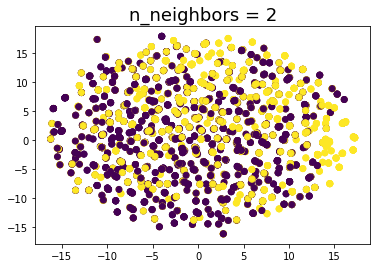

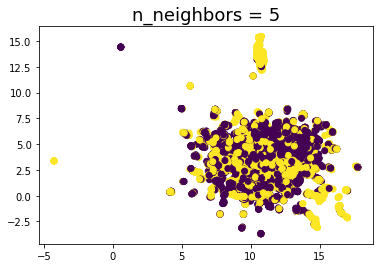

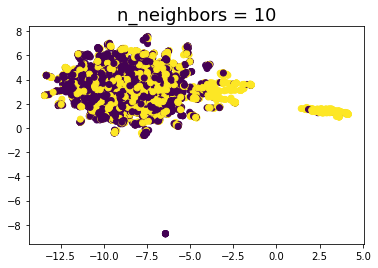

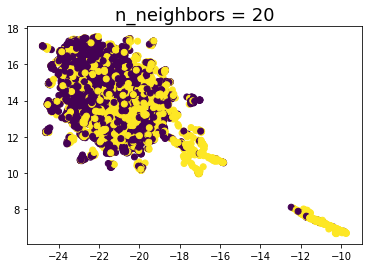

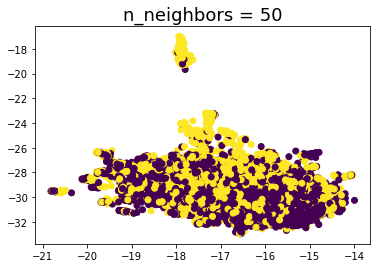

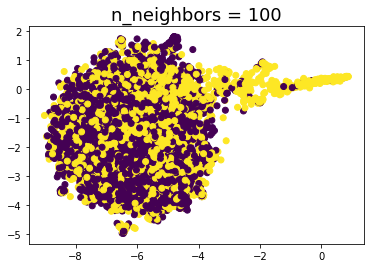

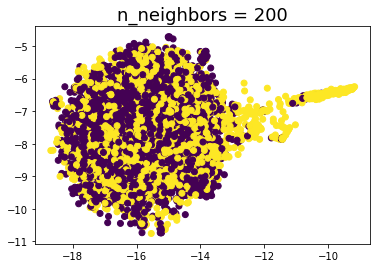

In [79]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

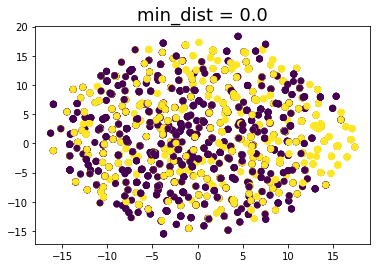

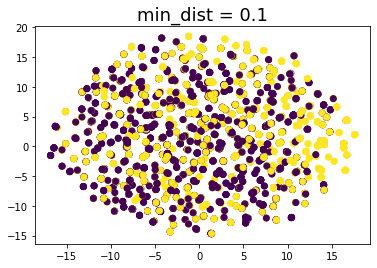

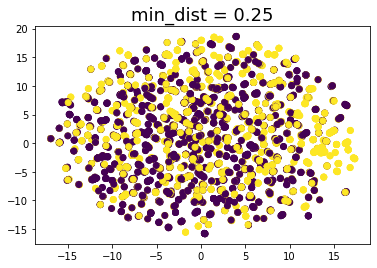

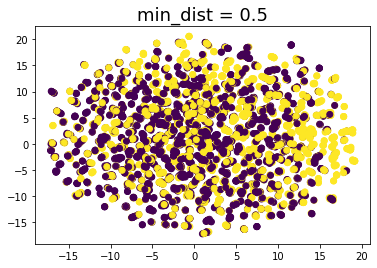

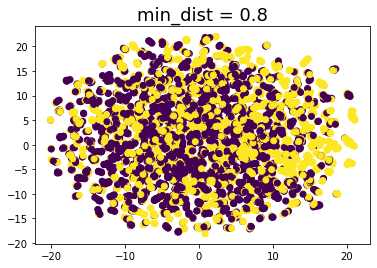

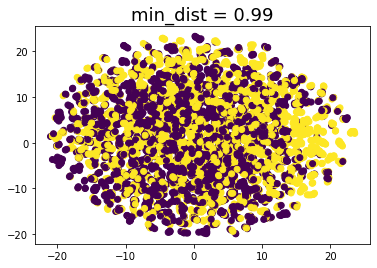

In [81]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))